### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the Data

In [2]:
txt = open("data.txt","r")
txt = pd.DataFrame(txt)

In [3]:
df = pd.DataFrame()
df["Text"] = txt[0].transform(lambda x : x.split(";")[0])
df["Label"] = txt[0].transform(lambda x : x.split(";")[1][:-1])

In [4]:
print(df.shape)
df.head()

(16000, 2)


,Text,Label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


### Data Preprocessing

In [5]:
df["Label"].value_counts()

,count
Label,
joy,5362
sadness,4666
anger,2159
fear,1937
love,1304
surprise,572


We will drop the surprise column as it is highly imbalanced

In [6]:
df = df[df["Label"] != "surprise"]

<Axes: xlabel='Label', ylabel='count'>

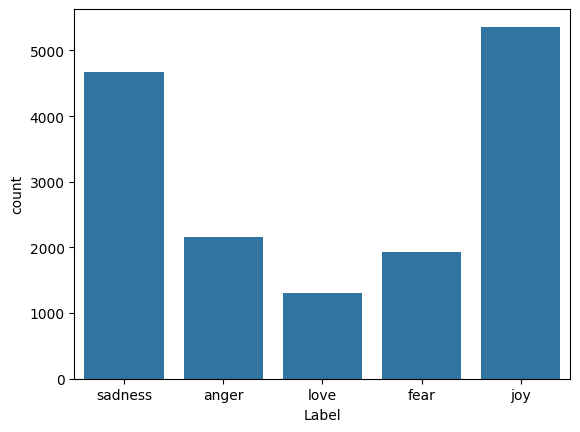

In [7]:
sns.countplot(x=df["Label"])

In [8]:
df.isnull().sum()

,0
Text,0
Label,0


In [9]:
# Removing Duplicate Value
print(df.duplicated().sum())
df = df.drop_duplicates()
df.reset_index(inplace=True,drop=True)

1


Checking if there are rows having the same text but different emotions

In [10]:
print(df["Text"].duplicated().sum())
df[df["Text"].duplicated() == True].head()

23


,Text,Label
4864,i feel on the verge of tears from weariness i ...,joy
5883,i still feel a craving for sweet food,love
6295,i tend to stop breathing when i m feeling stre...,anger
7316,i was intensely conscious of how much cash i h...,sadness
7915,i am not amazing or great at photography but i...,love


In [11]:
df[df["Text"] == df.iloc[4864]["Text"]]

,Text,Label
1442,i feel on the verge of tears from weariness i ...,love
4864,i feel on the verge of tears from weariness i ...,joy


In [12]:
# Removing Duplicate Value
index = df[df["Text"].duplicated() == True].index
df.drop(index,axis=0, inplace=True)
df.reset_index(inplace=True, drop=True)

In [13]:
print("Shape :", df.shape)

Shape : (15404, 2)


### Text Preprocessing

In [14]:
import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [15]:
def text_preprocessing(text):

    # Remove punctuations and numbers
    text = re.sub("[^a-zA-Z]"," ",text.lower())
    text = re.sub(r"\s+",' ',text)

    # Tokenization
    token = word_tokenize(text)

    # Remove StopWords
    token = [i for i in token if i not in stopwords.words("english")]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    token = [lemmatizer.lemmatize(word) for word in token]

    processed_text = " ".join(token)
    return processed_text

In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
  >>> import nltk
  >>> nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
  >>> import nltk
  >>> nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [23]:
df["Text"] = df["Text"].apply(lambda x : text_preprocessing(x))

### LabelEncoding

In [24]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["Label"] = encoder.fit_transform(df["Label"])

In [25]:
# Save Encoder
import pickle

# saving
with open('encoder.pickle', 'wb') as handle:
    pickle.dump(encoder, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [26]:
df.head()

,Text,Label
0,didnt feel humiliated,4
1,go feeling hopeless damned hopeful around some...,4
2,im grabbing minute post feel greedy wrong,0
3,ever feeling nostalgic fireplace know still pr...,3
4,feeling grouchy,0


## Train Test Split

In [27]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [28]:
y = pd.get_dummies(y)

In [29]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=69)

## Preparing Embedding Layer

In [31]:
pip install tensorflow


In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences


In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Use TensorFlow Keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from sklearn.preprocessing import LabelEncoder
import pickle


In [34]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(x_train["Text"])

x_train = word_tokenizer.texts_to_sequences(x_train["Text"])
x_test = word_tokenizer.texts_to_sequences(x_test["Text"])

In [35]:
# Save Tokenizer
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(word_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [36]:
# Adding one to store dim for words for which no pretrained word embeddings exist
vocab_length = len(word_tokenizer.word_index) + 1
print(vocab_length)

11709


In [37]:
# Padding all the text

print("Maximum Length of the sentence in the corpus :", max([len(i) for i in x_train]))

max_len = 35

x_train = pad_sequences(x_train,padding="post",maxlen=max_len)
x_test = pad_sequences(x_test,padding="post",maxlen=max_len)

Maximum Length of the sentence in the corpus : 35


In [39]:
!wget http://nlp.stanford.edu/data/glove.6B.zip


--2024-09-24 00:37:07--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-09-24 00:37:07--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-09-24 00:37:07--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [41]:
# Load GloVe Word Embeddings and Create Embedding Dict

embedding_dict = dict()
glove_file = open("glove.6B.100d.txt", encoding="utf8")

for line in glove_file:
    data = line.split()
    word = data[0]
    vec = np.asarray(data[1:51],dtype="float32")
    embedding_dict[word] = vec
glove_file.close()

In [42]:
# Create Embedding Matrix having 50 Columns

embedding_matrix = np.zeros((vocab_length,50))
for word,index in word_tokenizer.word_index.items():
    embedding_vector = embedding_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [43]:
embedding_matrix.shape

(11709, 50)

## Simple Neural Network

In [44]:
import tensorflow as tf
from tensorflow import keras

## LSTM  Long Short-Term Memory

In [47]:
lstm_model = keras.Sequential(
             [keras.layers.Embedding(vocab_length,50,weights=[embedding_matrix],input_length=max_len,trainable=False),
              keras.layers.LSTM(128),
              keras.layers.Dense(5,activation="softmax"),
             ])

In [48]:
opt = keras.optimizers.Adam(learning_rate=0.003)
lstm_model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['acc'])

In [49]:
lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │         585,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 585,450 (2.23 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 585,450 (2.23 MB)

In [51]:
# Training

lstm_model_history = lstm_model.fit(x_train,y_train,batch_size=32,epochs=30,validation_split=0.2)

Epoch 1/30
309/309 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - acc: 0.9382 - loss: 0.1860 - val_acc: 0.8596 - val_loss: 0.4325
Epoch 2/30
309/309 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.9437 - loss: 0.1578 - val_acc: 0.8763 - val_loss: 0.4007
Epoch 3/30
309/309 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 0.9680 - loss: 0.0904 - val_acc: 0.8840 - val_loss: 0.4173
Epoch 4/30
309/309 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9709 - loss: 0.0915 - val_acc: 0.8860 - val_loss: 0.3896
Epoch 5/30
309/309 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - acc: 0.9670 - loss: 0.0905 - val_acc: 0.8864 - val_loss: 0.4279
Epoch 6/30
309/309 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - acc: 0.9730 - loss: 0.0738 - val_acc: 0.8921 - val_loss: 0.4075
Epoch 7/30
309/309 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - acc: 0.9802 - loss: 0.0549 - val_acc: 0.8921 - val_loss: 0.4265
Epoch 8/30
309/309 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.9740 - loss: 0.0669 - val_acc: 0.8836 - val_loss: 0.4477
Epoch 9/30
309/309 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - ac

In [52]:
# Evaluation on Test Set

score = lstm_model.evaluate(x_test,y_test,verbose=1)

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9134 - loss: 0.3978


In [53]:
print("Test Score :",score[0])
print("Test Accuracy :",score[1])

Test Score : 0.4078889489173889
Test Accuracy : 0.910743236541748


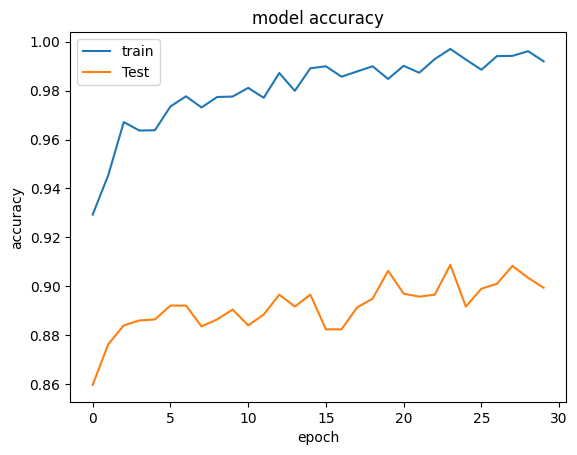

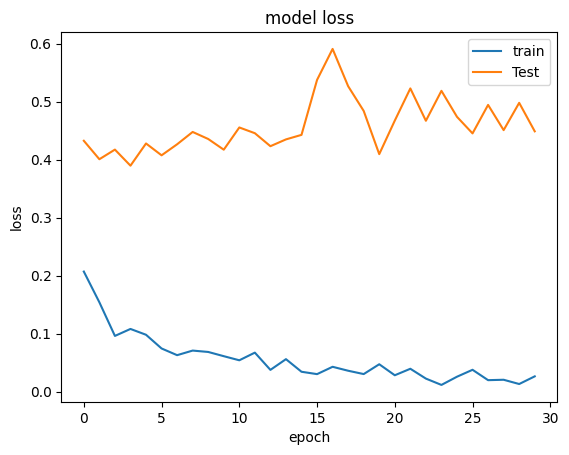

In [54]:
# Model Performance Chart

plt.plot(lstm_model_history.history["acc"])
plt.plot(lstm_model_history.history["val_acc"])

plt.title('model accuracy')
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","Test"])
plt.show()

plt.plot(lstm_model_history.history["loss"])
plt.plot(lstm_model_history.history["val_loss"])

plt.title('model loss')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","Test"])
plt.show()

In [55]:
lstm_model.save(f"./lstm_model.h5",save_format="h5")

In [56]:
!pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 12.2 MB/s eta 0:00:00


In [57]:
import gradio as gr
import numpy as np
import pickle
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

# Load the trained model
lstm_model = tf.keras.models.load_model("./lstm_model.h5")

# Load the tokenizer
with open('tokenizer.pickle', 'rb') as handle:
    word_tokenizer = pickle.load(handle)

# Load the label encoder
with open('encoder.pickle', 'rb') as handle:
    encoder = pickle.load(handle)

max_len = 35  # The maximum length you used in training

def predict_sentiment(text):
    # Preprocessing the text
    text = text.lower()
    text_seq = word_tokenizer.texts_to_sequences([text])
    padded_seq = pad_sequences(text_seq, padding='post', maxlen=max_len)

    # Making prediction
    prediction = lstm_model.predict(padded_seq)
    predicted_label = np.argmax(prediction, axis=1)

    # Decode the label back to its original form
    return encoder.inverse_transform(predicted_label)[0]

# Create Gradio interface
iface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=2, placeholder="Enter text for sentiment analysis..."),
    outputs="text",
    title="Sentiment Analysis with LSTM",
    description="Enter a text to predict its sentiment."
)

# Launch the interface
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://d689c14aee0fbb5bcf.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
